In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#Importing data
df = pd.read_csv('airline-passengers.csv')

In [2]:
#Printing head
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
#Printing tail
df.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [4]:
#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=df[0:100] 
test=df[100:]

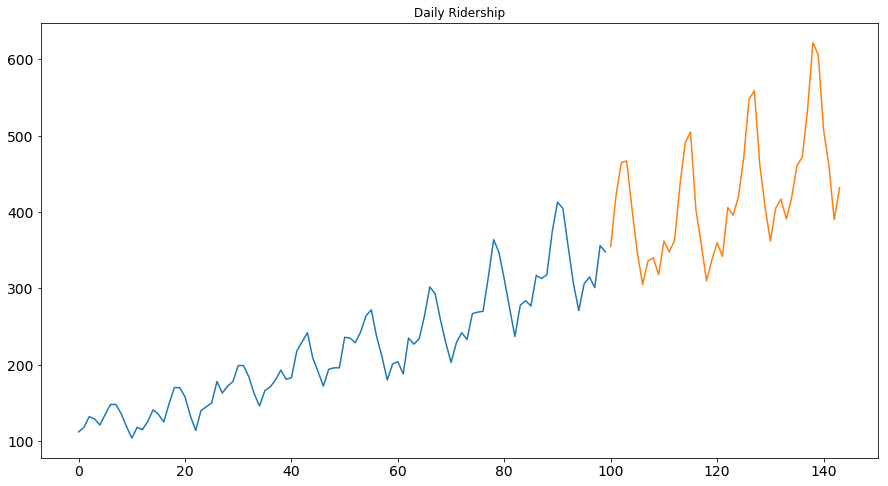

In [5]:
#Plotting data
train.Passengers.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Passengers.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()

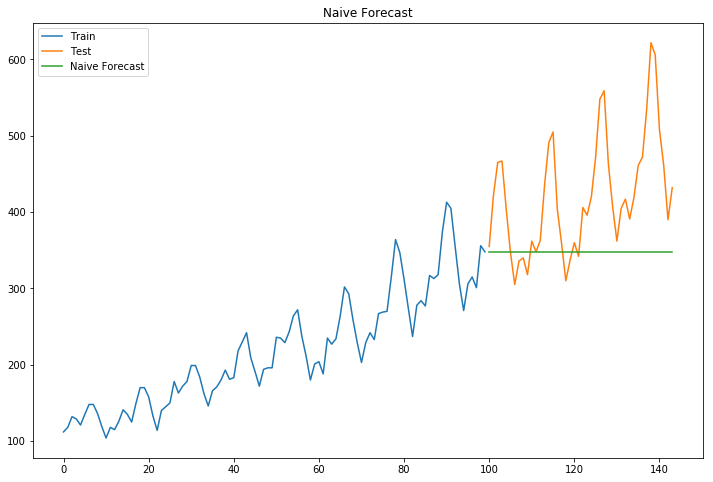

In [6]:
dd= np.asarray(train.Passengers)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index,test['Passengers'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()


In [7]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [8]:
rms = sqrt(mean_squared_error(test.Passengers, y_hat.naive))
rms

105.74981194911284

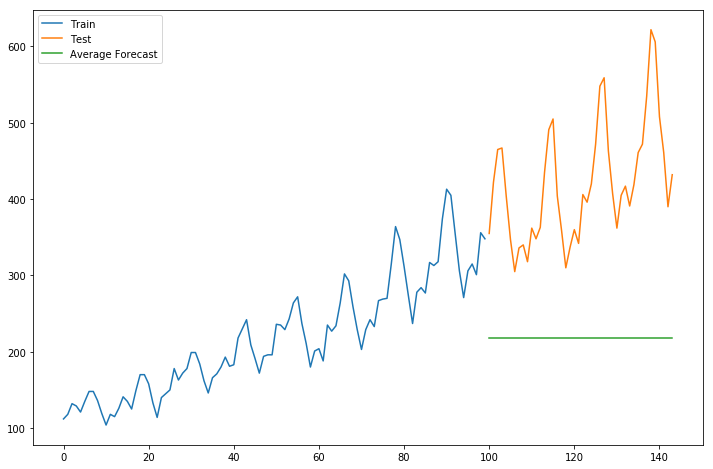

In [9]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Passengers'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [10]:
rms = sqrt(mean_squared_error(test.Passengers, y_hat_avg.avg_forecast))
print(rms)

216.64411025710095


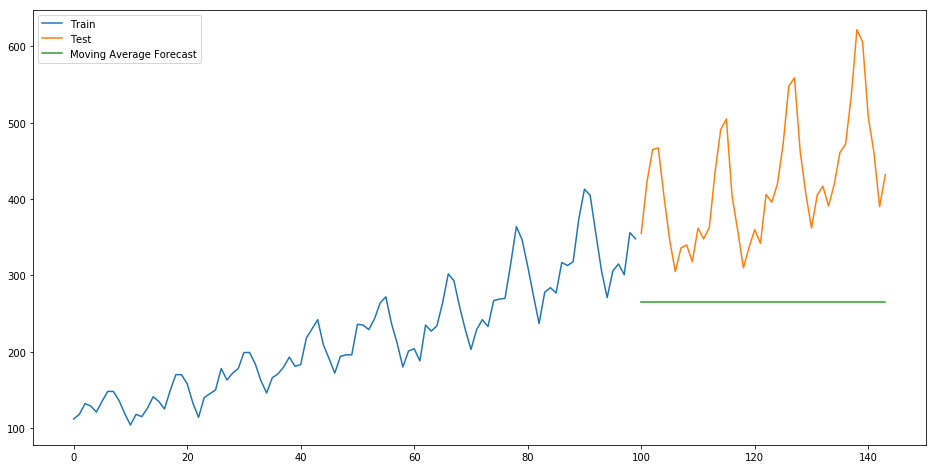

In [11]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Passengers'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [12]:
rms = sqrt(mean_squared_error(test.Passengers, y_hat_avg.moving_avg_forecast))
print(rms)

174.18956562529016


In [13]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

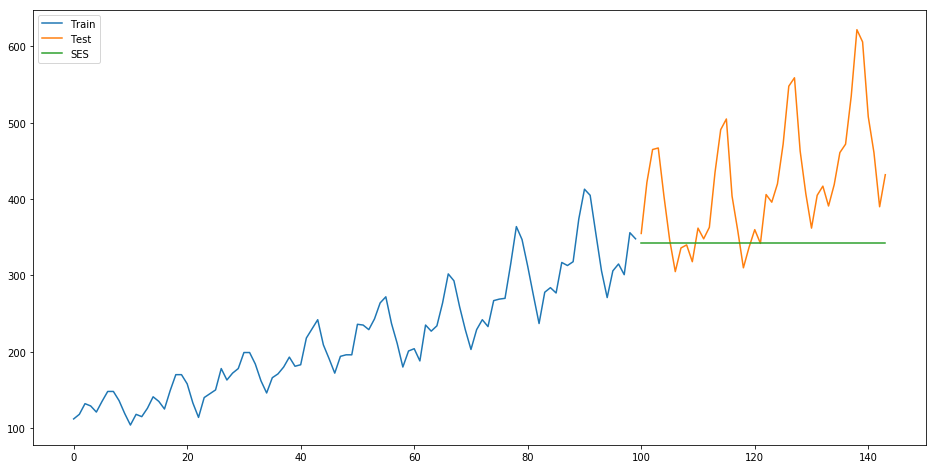

In [15]:
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Passengers'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [16]:
rms = sqrt(mean_squared_error(test.Passengers, y_hat_avg.SES))
print(rms)

109.29360124771299


# Holt’s Linear Trend method

In [17]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Passengers).plot()
result = sm.tsa.stattools.adfuller(train.Passengers)
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'inferred_freq'

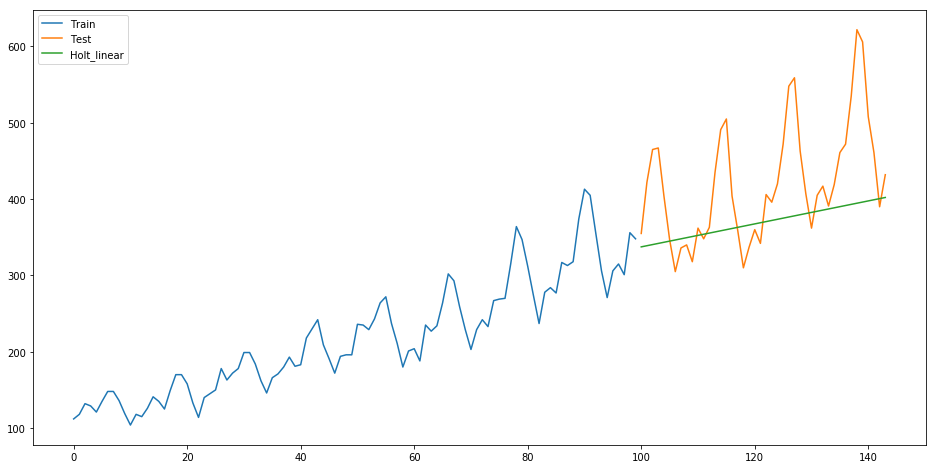

In [18]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Passengers'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [20]:
rms = sqrt(mean_squared_error(test.Passengers, y_hat_avg.Holt_linear))
print(rms)

86.15565162839955


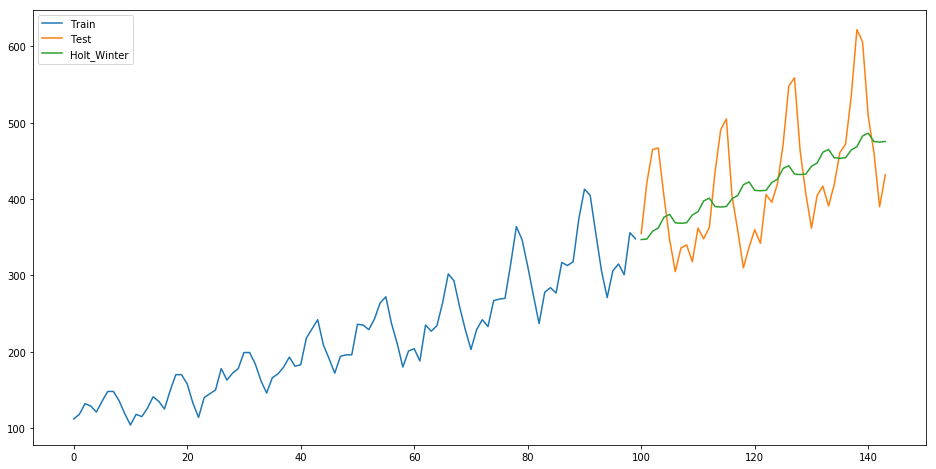

In [21]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [24]:
rms = sqrt(mean_squared_error(test.Passengers, y_hat_avg.Holt_Winter))
print(rms)

67.27277378922481
